## Mode Creation & Evaluation

The goal of this notebook is to implement a KMeans clustering agorithm on our song dataset. We have aready prepared this dataset as well as reduced the dimensions so all that is needed is to build the machine learning model. In order to build the best model we need to evaluate the best number of clusters using a number of different techniques. 

### Imports

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../data/train_pca.csv')
df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17
0,0.830080,0.465905,-0.682907,0.459775,-0.048157,-0.023009,0.024281,-0.025027,-0.047490,-0.039174,0.233376,-0.402060,-0.016817,0.178287,0.170505,-0.288195,-0.012519
1,0.156028,0.484808,0.563210,1.048371,0.018856,-0.094235,-0.023386,0.027350,-0.155324,-0.096387,0.215231,-0.415944,0.055307,-0.189985,0.032939,0.016462,-0.167165
2,0.160762,0.465310,-0.179918,0.571027,0.124836,-0.460624,0.371389,0.879080,0.309662,-0.470147,0.131147,-0.271094,0.260590,0.244919,0.033745,-0.089019,0.044353
3,0.186446,0.500750,-0.241657,0.581487,0.093614,-0.325202,0.243419,0.480467,-0.167322,0.356914,0.948602,0.236601,-0.070167,-0.225043,0.025192,-0.059804,0.182145
4,0.163122,0.496285,-0.100136,0.665255,0.078643,-0.305063,0.231376,0.456500,-0.183614,0.352033,0.970249,0.245529,-0.007566,-0.210335,-0.015700,-0.051985,0.007990


### KMeans Clustering

To begin we will build a K-Means clustering model, but in order to select the optimal number of clusters we must use the elbow method. This is a well known method that is used to choose the optimal number of clusters in K-Means clustering by plotting the number of clusters by the total inertia of said clusters. 

In [3]:
#we will test out multiple clustering models here
inertias = []
silh_scores = []
for num_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    labels = kmeans.fit_predict(df)
    silh_scores.append(silhouette_score(df, labels))
    inertias.append(kmeans.inertia_)

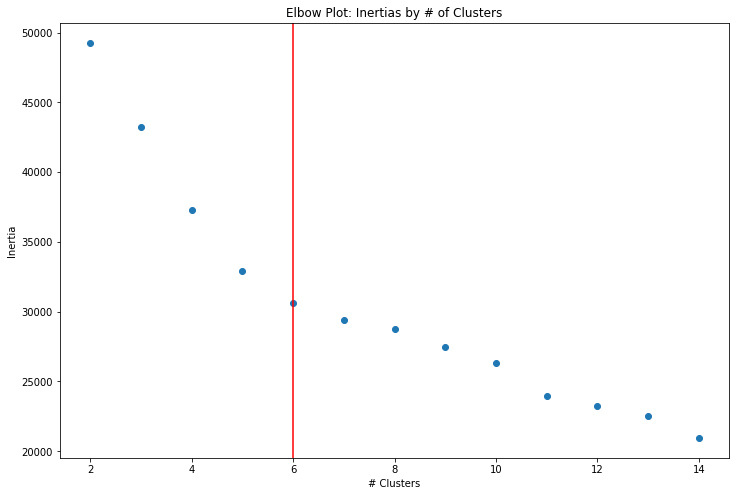

In [4]:
#plot inertia by number of clusters
plt.figure(figsize=(12, 8))
plt.plot(range(2, 15), inertias, 'o')
plt.axvline(6, color='red')
plt.title('Elbow Plot: Inertias by # of Clusters')
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.show()

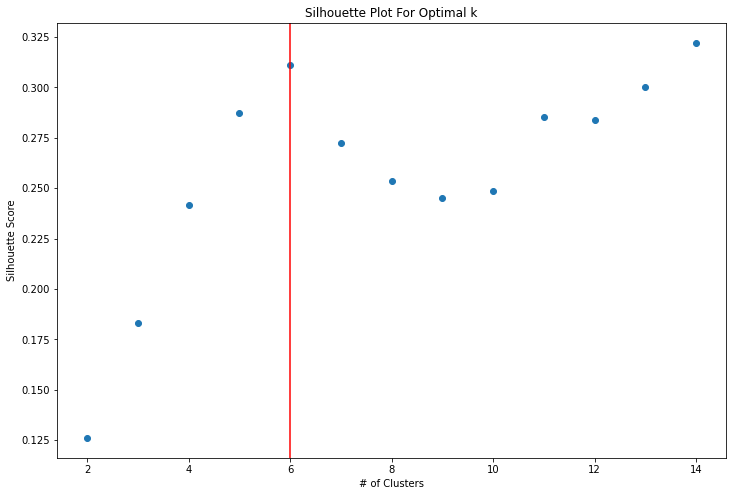

In [5]:
#plot silhouette averages by number of clusters
plt.figure(figsize=(12, 8))
plt.plot(range(2, 15), silh_scores, 'o')
plt.axvline(6, color='red')
plt.title('Silhouette Plot For Optimal k')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Now that we know how many clusters to use, let us build a KMeans clustering agorithm with our optimal number of clusters and visualize our resuts. 

In [7]:
#build our kmeans algorithm with optimal clusters
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10).fit(df)

In [13]:
#lets include our clusters in our original dataset for visualization
df['cluster'] = kmeans.labels_

<Axes: xlabel='pca_1', ylabel='pca_2'>

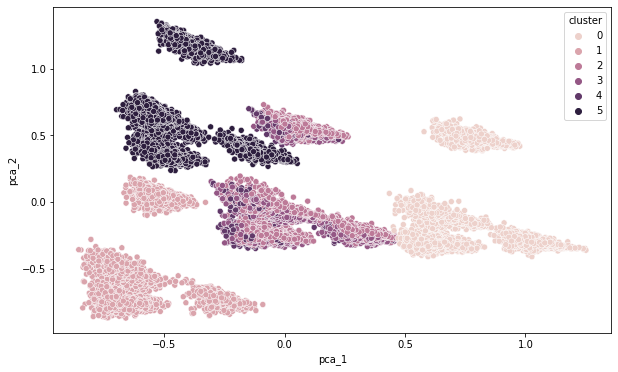

In [17]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster')

<Axes: xlabel='pca_2', ylabel='pca_3'>

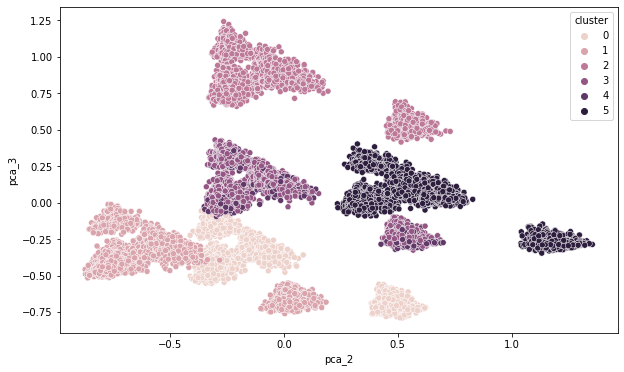

In [18]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_2', y='pca_3', hue='cluster')

<Axes: xlabel='pca_3', ylabel='pca_4'>

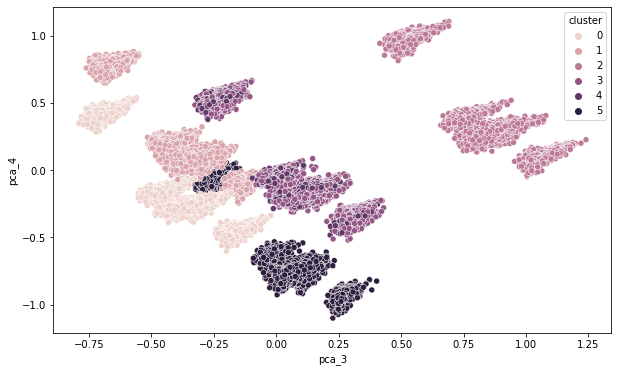

In [19]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_3', y='pca_4', hue='cluster')

<Axes: xlabel='pca_4', ylabel='pca_5'>

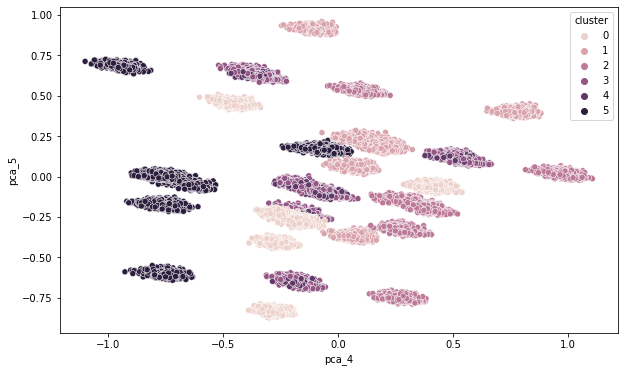

In [20]:
#lets visualize our clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_4', y='pca_5', hue='cluster')